## Jupyter
- 과거의 cell을 고칠 수 있음
- cell 들을 동시에 실행시킬 수 있음
- 과거 cell 결과를 다시 안돌리고도 쓸 수 있음
  (과거의 cell 실행 결과는 메모리에 저장이 되어있음)

## 실행시키기
- cmd 창을 열고 (검색)
- jupyter notebook

## 단축키
- ``shift + enter``: cell을 실행

# 오늘 할 내용

- 재귀함수
    * 정의: 어떠한 함수를 정의할 때, 자기 자신을 사용하여 정의하는 함수
        - ex) fib: 1 1 2 3 5 8 ..
        - fib(n) = fib(n-1) + fib(n-2) , if n >= 2
        -        = 1  , if n < 2
        - fac(n) = fac(n-1) * n
        - n! = (n-1)! * n, if n > 1
        -    = 1 , if n <= 1
    * 구성
        - initial condition
            * 얘 없으면 난리남......
            * ex) (-) 무한대로 가버리면...
            * RecursionError: maximum recursion depth exceeded
        - 재귀 부분 (Recursive hypothesis)
    * 느릴 수가 있다!
        - 쓸데없는 계산을 너무 많이 해서...
        - tree 구조를 생각
        - ex) fib(n) --> O(2^n)
    * 느린 재귀함수의 해결책!
        - dynamic programming
            + 똑같은 계산을 한 번만 하고 싶어서,
            + 내가 계산해 뒀던 것을 저장해두기!
            + 중간 계산물을 저장할 보관소 (= Reservoir)
            + 굳이 단점을 꼽자면, 저장소때문에 메모리를 잡아먹음
        - tail recursion
            + 꼬리(가장 최근, 내가 딱 필요한 것) 만 보기
- plot그리기
    - histogram
    - scatter plot


In [1]:
def fac(n):
    fac_n = 1
    
    # Initial condition
    if n <= 1:
        fac_n = 1
    
#     재귀 부분
    else:
        fac_n = fac(n-1) * n
    
    return fac_n


In [2]:
def naive_fib(n):
    # Initial condition
    fib_n = 1
    
    # Recursive hypothesis
    if n >= 2:
        fib_n = naive_fib(n-1) + naive_fib(n-2)
        
    return fib_n

In [3]:
def dynamic_fib(n, reservoir={}):
    # Initial condition
    fib_n = 1
    
    # Recursive hypothesis
    if n >= 2:
        # Check if fib(n-1) is in the reservoir
        if (n-1) in reservoir:
            fib_n_1 = reservoir[n - 1]
        else:
            fib_n_1, reservoir = dynamic_fib(n - 1, reservoir)
            
        # Check if fib(n-2) is in the reservoir
        if (n-2) in reservoir:
            fib_n_2 = reservoir[n - 2]
        else:
            fib_n_2, reservoir = dynamic_fib(n - 2, reservoir)
        
        # Calculate fib(n)
        fib_n = fib_n_1 + fib_n_2
        
        # Save fib(n) in reservoir
        reservoir[n] = fib_n
        
    return fib_n, reservoir

In [6]:
def tail_toss(n):
    # Initial condition
    fib_n_1, fib_n_2 = 1, 1
    
    # Recursive hypothesis
    if n >= 3:
        fib_n_2, fib_n_3 = tail_toss(n-1)
        fib_n_1 = fib_n_2 + fib_n_3
    
    print(fib_n_1, fib_n_2)
    return fib_n_1, fib_n_2

def tail_fib(n):
    fib_n_1, fib_n_2 = tail_toss(n)
    return fib_n_1 + fib_n_2
          

In [9]:
import time

# Trash fibonacci
# start = time.time()
# print(naive_fib(40))
# end = time.time()
# elapsed = end - start
elapsed = 56.72502
print(165580141)
print("Naive fib time: %s sec" % elapsed)

# Dynamic fibonacci
start = time.time()
fib_40, reservoir = dynamic_fib(40)
print(fib_40)
end = time.time()
elapsed = end - start
print("Dynamic fib time: %s sec" % elapsed)

# Tail fibonacci
start = time.time()
fib_40 = tail_fib(40)
print(fib_40)
end = time.time()
elapsed = end - start
print("Tail fib time: %s sec" % elapsed)

165580141
Naive fib time: 56.72502 sec
165580141
Dynamic fib time: 0.0021560192108154297 sec
165580141
Tail fib time: 0.00023603439331054688 sec


### Plot 그리기

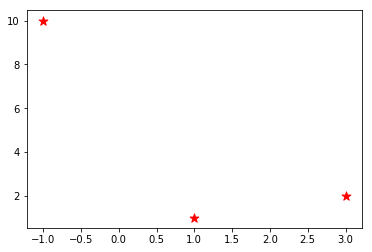

In [28]:
import matplotlib.pyplot as plt

X = [3, 1, -1]
Y = [2, 1, 10]

# plt.plot(X, Y)
# plt.show()
plt.scatter(X, Y, color='r', s=85, marker='*')
plt.show()

## 파일 읽기 / 쓰기
- open() --> 가장 간단
- pandas

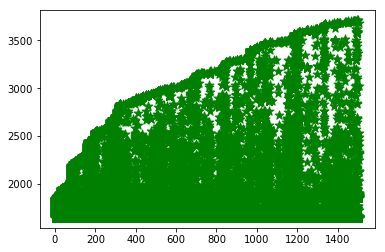

In [34]:
import pandas as pd

rating_data = pd.read_csv('./rating.tsv', sep='\t', names=['u', 'i', 'r'])
X = rating_data.u
Y = rating_data.i
plt.scatter(X, Y, color='g', s=85, marker='*')
plt.show()